In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from craftax.craftax_env import make_craftax_env_from_name
import jax
import numpy as np
import jax.numpy as jnp
from functools import partial
from craftax.craftax.renderer import render_craftax_pixels
from craftax.craftax import constants
import matplotlib.pyplot as plt
import craftax_env
from craftax.craftax.constants import Action

Loading textures from cache.
Textures successfully loaded from cache.


/Users/wilka/miniforge3/envs/preplay-ai/lib/python3.10/site-packages/jax/_src/core.py:700: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/Users/wilka/miniforge3/envs/preplay-ai/lib/python3.10/site-packages/jax/_src/core.py:700: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(


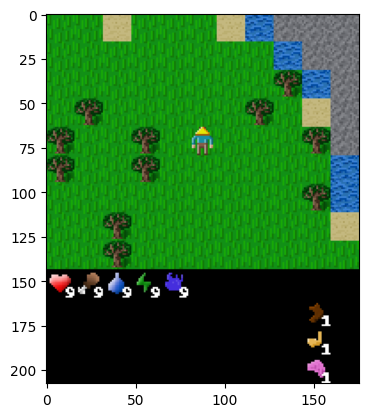


Currently achievable:
- Collect Stone
- Collect Wood


In [13]:
from craftax_env import CraftaxSymbolicEnvNoAutoReset
from jaxneurorl.wrappers import TimestepWrapper

render = jax.jit(partial(render_craftax_pixels, block_pixel_size=constants.BLOCK_PIXEL_SIZE_IMG))
def render_craftax(state):
    image = render_craftax_pixels(state, block_pixel_size=constants.BLOCK_PIXEL_SIZE_IMG)
    return image/255.0
    
render_craftax = jax.jit(render_craftax)


env = TimestepWrapper(CraftaxSymbolicEnvNoAutoReset(), False)
env_params = env.default_params.replace(
    mob_despawn_distance=3,
    day_length=3,
    world_seeds=jnp.arange(2, 10),
    max_timesteps=3,
)

seed = 18
rng = jax.random.PRNGKey(seed)

timestep = env.reset(rng, env_params)
image = render_craftax(timestep.state)
plt.imshow(image)
plt.show()
possible = craftax_env.get_possible_achievements(timestep.state)
craftax_env.print_possible_achievements(possible)


In [11]:
timestep.state.inventory.potions

Array([0, 0, 0, 0, 0, 0], dtype=int32)

In [9]:
from pprint import pprint
pprint(jax.tree.map(lambda x: x.shape, timestep.state))

EnvState(map=(9, 48, 48),
         item_map=(9, 48, 48),
         mob_map=(9, 48, 48),
         light_map=(9, 48, 48),
         down_ladders=(9, 2),
         up_ladders=(9, 2),
         chests_opened=(9,),
         monsters_killed=(9,),
         player_position=(2,),
         player_level=(),
         player_direction=(),
         player_health=(),
         player_food=(),
         player_drink=(),
         player_energy=(),
         player_mana=(),
         is_sleeping=(),
         is_resting=(),
         player_recover=(),
         player_hunger=(),
         player_thirst=(),
         player_fatigue=(),
         player_recover_mana=(),
         player_xp=(),
         player_dexterity=(),
         player_strength=(),
         player_intelligence=(),
         inventory=Inventory(wood=(),
                             stone=(),
                             coal=(),
                             iron=(),
                             diamond=(),
                             sapling=(),
    

In [ ]:
timestep..

----------


/Users/wilka/miniforge3/envs/preplay-ai/lib/python3.10/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)
/Users/wilka/miniforge3/envs/preplay-ai/lib/python3.10/site-packages/jax/_src/core.py:700: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/Users/wilka/miniforge3/envs/preplay-ai/lib/python3.10/site-packages/jax/_src/core.py:700: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to a

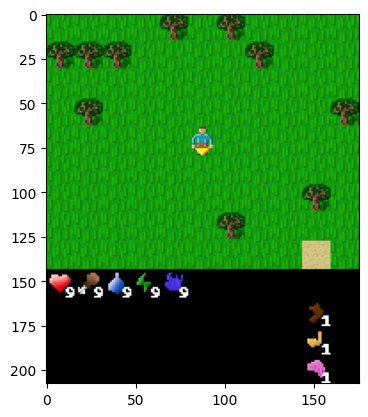

False

Currently achievable:
- Collect Wood
----------


/Users/wilka/miniforge3/envs/preplay-ai/lib/python3.10/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


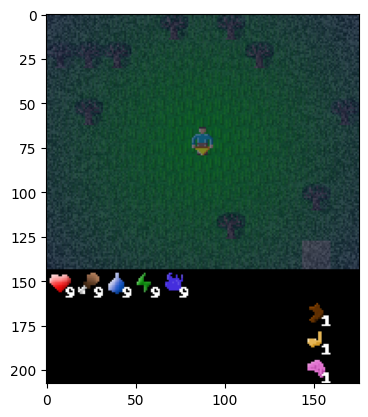

False

Currently achievable:
- Collect Wood
----------


/Users/wilka/miniforge3/envs/preplay-ai/lib/python3.10/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


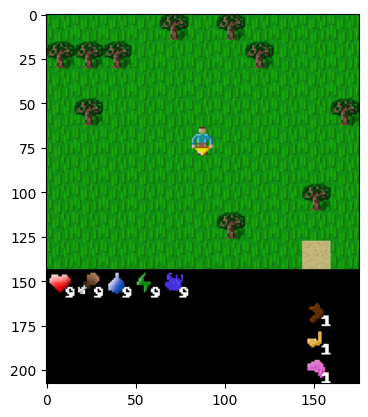

True

Currently achievable:
- Collect Wood
----------


/Users/wilka/miniforge3/envs/preplay-ai/lib/python3.10/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


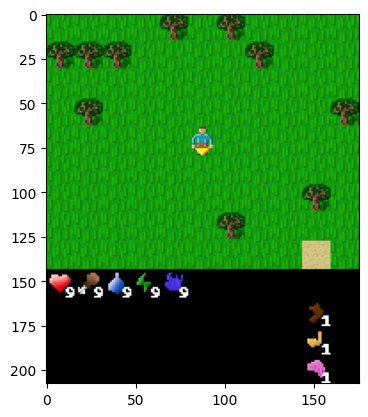

True


/Users/wilka/miniforge3/envs/preplay-ai/lib/python3.10/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)



Currently achievable:
- Collect Wood
----------


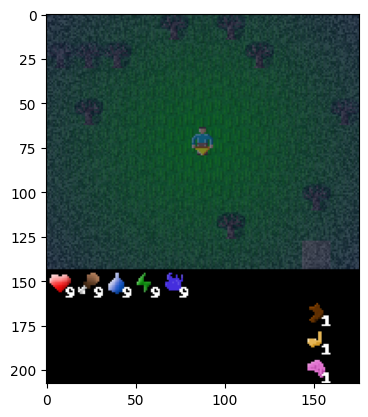

True

Currently achievable:
- Collect Wood
----------


/Users/wilka/miniforge3/envs/preplay-ai/lib/python3.10/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


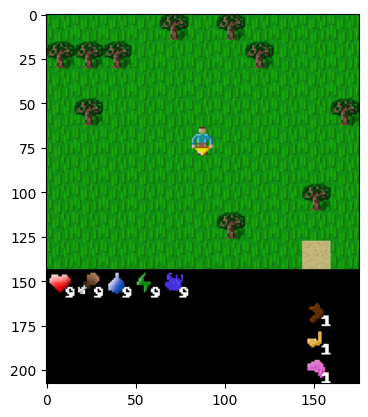

True

Currently achievable:
- Collect Wood
----------


/Users/wilka/miniforge3/envs/preplay-ai/lib/python3.10/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


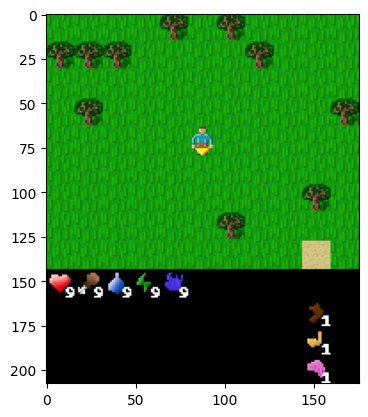

True


/Users/wilka/miniforge3/envs/preplay-ai/lib/python3.10/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)



Currently achievable:
- Collect Wood
----------


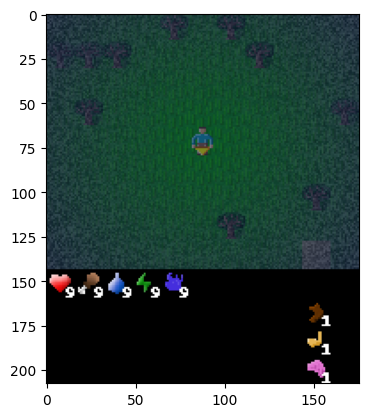

True

Currently achievable:
- Collect Wood
----------


/Users/wilka/miniforge3/envs/preplay-ai/lib/python3.10/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


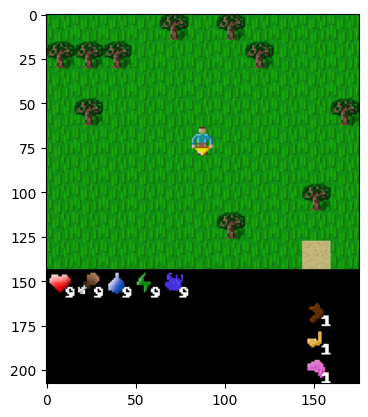

True

Currently achievable:
- Collect Wood
----------


/Users/wilka/miniforge3/envs/preplay-ai/lib/python3.10/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


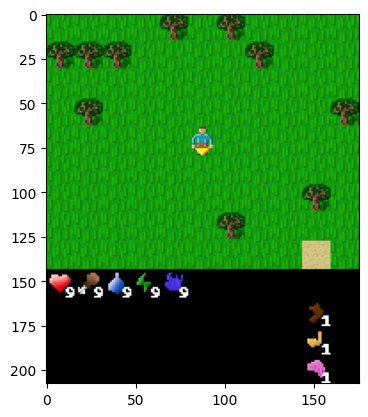

True

Currently achievable:
- Collect Wood


In [21]:
for _ in range(10):
    print('-'*10)
    rng, rng_ = jax.random.split(rng)
    action = env.action_space().sample(rng_)
    timestep = env.step(rng, timestep, action, env_params)
    image = render_craftax(timestep.state)
    plt.imshow(image)
    plt.show()
    print(timestep.last())
    possible = craftax_env.get_possible_achievements(timestep.state)
    craftax_env.print_possible_achievements(possible)
